In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Let's Understand the problem

- A stroke occurs when part of the brain loses its blood supply and stops working. This causes the part of the body that the injured brain controls to stop working. A stroke also is called a cerebrovascular accident, CVA, or "brain attack."

- The types of strokes include:

1) Ischemic stroke (part of the brain loses blood flow)

2) Hemorrhagic stroke (bleeding occurs within the brain)

3) Transient ischemic attack, TIA, or mini-stroke (The stroke symptoms resolve within minutes, but may take up to 24 hours on their own without treatment. This is a warning sign that a stroke may occur in the near future.)

# Causes of Stroke:

1) Age. Stroke risk increases with age. Three-quarters of strokes occur in people ages 65 and older.

2) Geography. The highest U.S. death rates from stroke occur in the southeastern United States.

3) Gender. Men are more likely than women to have a stroke.

4) Certain lifestyle factors and conditions also increase the risk for stroke. The most important of these include:

5) High blood pressure

6) Diabetes

7) Heart disease (such as atrial fibrillation)

8) Previous stroke or transient ischemic attack

9) Cigarette smoking

10) Additional risk factors include:

11) Physical inactivity

12) Overweight or obesity

13) High cholesterol

14) Sickle cell disease

15) Drinking too much alcohol

16) Family history of stroke

17) Drug abuse

18) Genetic conditions, such as blood-clotting or vascular disorders (for example, Factor V Leiden or CADASIL)

19) Certain medications (such as hormonal birth control pills)

20) Being pregnant

21) Menopause

# Lesser risk factors include:

1) Head and neck injuries

2) Recent viral or bacterial infections

In [2]:
#read the dataset
df=pd.read_csv("healthcare_dataset_stroke_data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isna().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

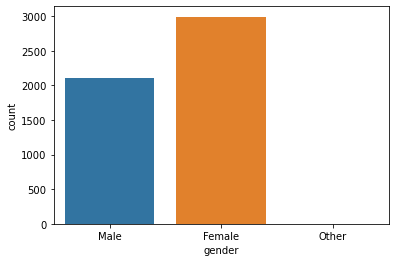

In [8]:
sns.countplot(data=df["stroke"], x=df["gender"])
plt.show()

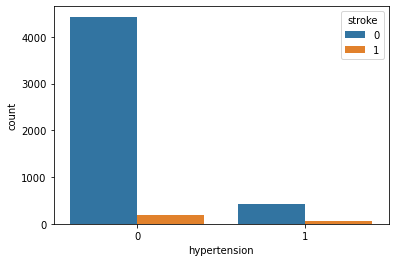

In [9]:
sns.countplot(data=df,x = 'hypertension',hue = 'stroke',)
plt.show()

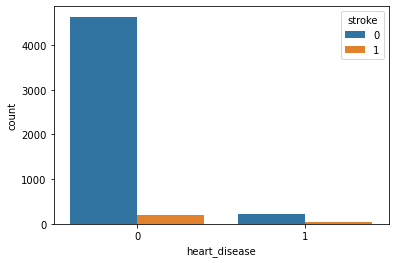

In [10]:
sns.countplot(data=df,x = 'heart_disease',hue = 'stroke',)
plt.show()

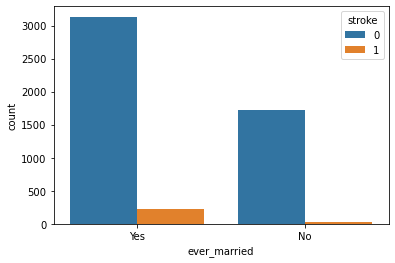

In [11]:
sns.countplot(data=df,x = 'ever_married',hue = 'stroke',)
plt.show()

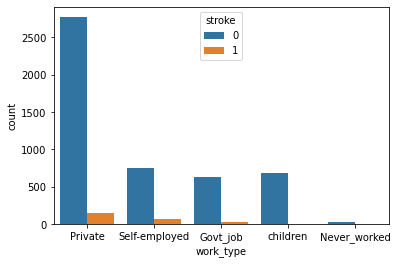

In [12]:
sns.countplot(data=df,x = 'work_type',hue = 'stroke',)
plt.show()

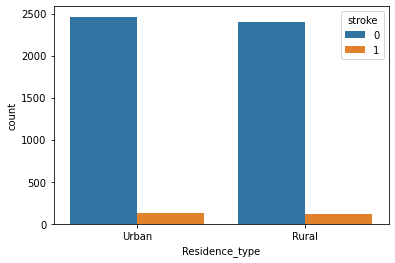

In [13]:
sns.countplot(data=df,x = 'Residence_type',hue = 'stroke',)
plt.show()

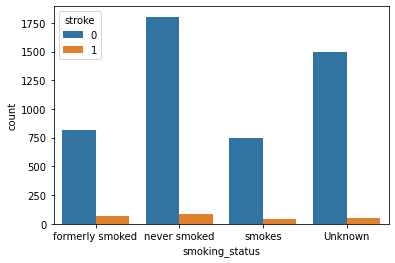

In [14]:
sns.countplot(data=df,x = 'smoking_status',hue = 'stroke',)
plt.show()

## Feature Engineering

In [15]:
df.dropna(inplace = True)

In [16]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [17]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0,0,0,0,0,0,0,1,0,0,0,0
5106,44873,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


## Splitting the Data

In [18]:
x = df.drop(['stroke'], axis=1).values
y = df['stroke'].values

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report

In [21]:
#step 1-: init the model
ann=Sequential()

#step2-: add layers into model
ann.add(Dense(35,activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(35,activation='relu'))
ann.add(Dropout(rate=0.2))

ann.add(Dense(1,activation='sigmoid'))

#step3-: establish connection between the layers
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

ann.fit(xtrain,ytrain,epochs=1000,validation_data=(xtest,ytest),verbose=1,batch_size=128,callbacks=[early_stop])

Epoch 1/1000
27/27 [==============================] - 1s 10ms/step - loss: 1007.8870 - accuracy: 0.6551 - val_loss: 184.3090 - val_accuracy: 0.9566
Epoch 2/1000
27/27 [==============================] - 0s 3ms/step - loss: 297.5670 - accuracy: 0.9307 - val_loss: 204.5061 - val_accuracy: 0.9566
Epoch 3/1000
27/27 [==============================] - 0s 3ms/step - loss: 261.9722 - accuracy: 0.9267 - val_loss: 160.7991 - val_accuracy: 0.9566
Epoch 4/1000
27/27 [==============================] - 0s 3ms/step - loss: 248.2239 - accuracy: 0.9112 - val_loss: 152.1314 - val_accuracy: 0.9566
Epoch 5/1000
27/27 [==============================] - 0s 3ms/step - loss: 217.4032 - accuracy: 0.9153 - val_loss: 144.6641 - val_accuracy: 0.9566
Epoch 6/1000
27/27 [==============================] - 0s 3ms/step - loss: 196.9515 - accuracy: 0.9171 - val_loss: 128.1531 - val_accuracy: 0.9566
Epoch 7/1000
27/27 [==============================] - 0s 3ms/step - loss: 194.9018 - accuracy: 0.9080 - val_loss: 129.4765

Epoch 58/1000
27/27 [==============================] - 0s 2ms/step - loss: 2.1958 - accuracy: 0.9540 - val_loss: 0.2317 - val_accuracy: 0.9566
Epoch 59/1000
27/27 [==============================] - 0s 2ms/step - loss: 2.7689 - accuracy: 0.9479 - val_loss: 0.2536 - val_accuracy: 0.9566
Epoch 60/1000
27/27 [==============================] - 0s 2ms/step - loss: 2.0185 - accuracy: 0.9508 - val_loss: 0.2322 - val_accuracy: 0.9566
Epoch 61/1000
27/27 [==============================] - 0s 2ms/step - loss: 2.1701 - accuracy: 0.9497 - val_loss: 0.3035 - val_accuracy: 0.9566
Epoch 62/1000
27/27 [==============================] - 0s 2ms/step - loss: 2.5178 - accuracy: 0.9508 - val_loss: 0.2180 - val_accuracy: 0.9566
Epoch 63/1000
27/27 [==============================] - 0s 2ms/step - loss: 1.8386 - accuracy: 0.9508 - val_loss: 0.2143 - val_accuracy: 0.9566
Epoch 64/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.7313 - accuracy: 0.9523 - val_loss: 0.2165 - val_accuracy: 0.9566

In [22]:
ann.history.history

{'loss': [1007.8870239257812,
  297.56695556640625,
  261.97216796875,
  248.22393798828125,
  217.40318298339844,
  196.95147705078125,
  194.9017791748047,
  163.8438262939453,
  153.2079315185547,
  146.5535125732422,
  129.97145080566406,
  105.5588150024414,
  104.98343658447266,
  91.61428833007812,
  91.23757934570312,
  74.3639907836914,
  73.81597137451172,
  64.29492950439453,
  61.16584396362305,
  59.27044677734375,
  51.27661895751953,
  48.51288604736328,
  42.056495666503906,
  40.13334274291992,
  38.752891540527344,
  35.23829650878906,
  31.63303565979004,
  31.835914611816406,
  28.054548263549805,
  24.91010093688965,
  21.449230194091797,
  18.792612075805664,
  15.81491470336914,
  14.001173973083496,
  9.839487075805664,
  7.854229927062988,
  5.918807029724121,
  6.20424747467041,
  4.651613712310791,
  4.374045372009277,
  4.719696044921875,
  4.805846691131592,
  3.773172616958618,
  4.0302252769470215,
  3.4074056148529053,
  2.913353443145752,
  3.6704072952

<AxesSubplot:>

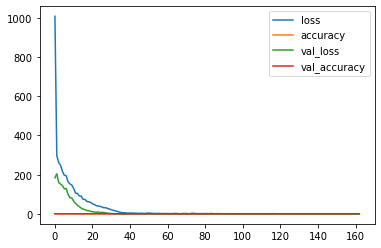

In [23]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [24]:
#step4-: make prediction
ypred=ann.predict(xtest)

47/47 [==============================] - 0s 825us/step


In [25]:
ypred

array([[0.06744425],
       [0.06007339],
       [0.06126127],
       ...,
       [0.06068226],
       [0.05904761],
       [0.06744425]], dtype=float32)

In [26]:
#step 5 -: set the threshold.
ypred=ypred>0.5
ypred=np.where(ypred<0.5,0,1)

In [27]:
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        64

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.94      1473



## Handling imbalance data using SMOTE

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(ytrain)
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()

#X_train, y_train = smt.fit_resample(X_train, y_train)
xtrain_sm, ytrain_sm = smt.fit_resample(xtrain, ytrain)

counter = Counter(ytrain_sm)
print('After',counter)

Before Counter({0: 3291, 1: 145})
After Counter({0: 3291, 1: 3291})
